In [ ]:
# read data
data = read.table("gauge.txt", header = TRUE)
head(data)

,density,gain
,<dbl>,<dbl>
1,0.686,17.6
2,0.686,17.3
3,0.686,16.9
4,0.686,16.2
5,0.686,17.1
6,0.686,18.5


In [ ]:
library(tidyverse)

## Exploratory data analysis

In [ ]:
summary(data)

    density            gain       
 Min.   :0.0010   Min.   : 16.20  
 1st Qu.:0.1480   1st Qu.: 37.80  
 Median :0.3180   Median : 88.25  
 Mean   :0.3311   Mean   :142.57  
 3rd Qu.:0.5080   3rd Qu.:203.50  
 Max.   :0.6860   Max.   :436.00  

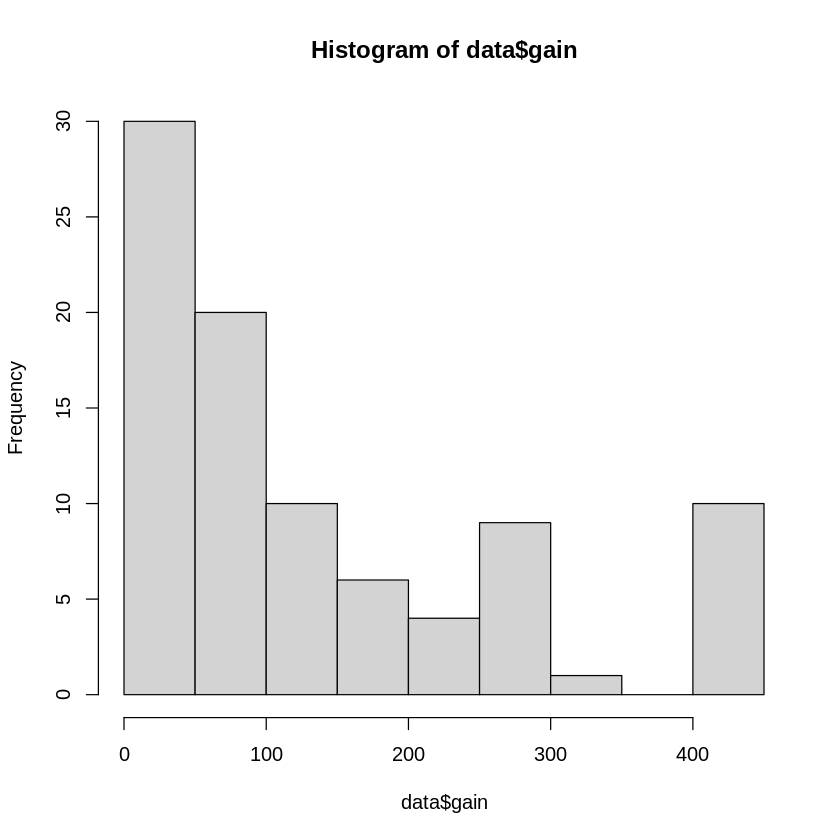

In [ ]:
hist(data$gain)

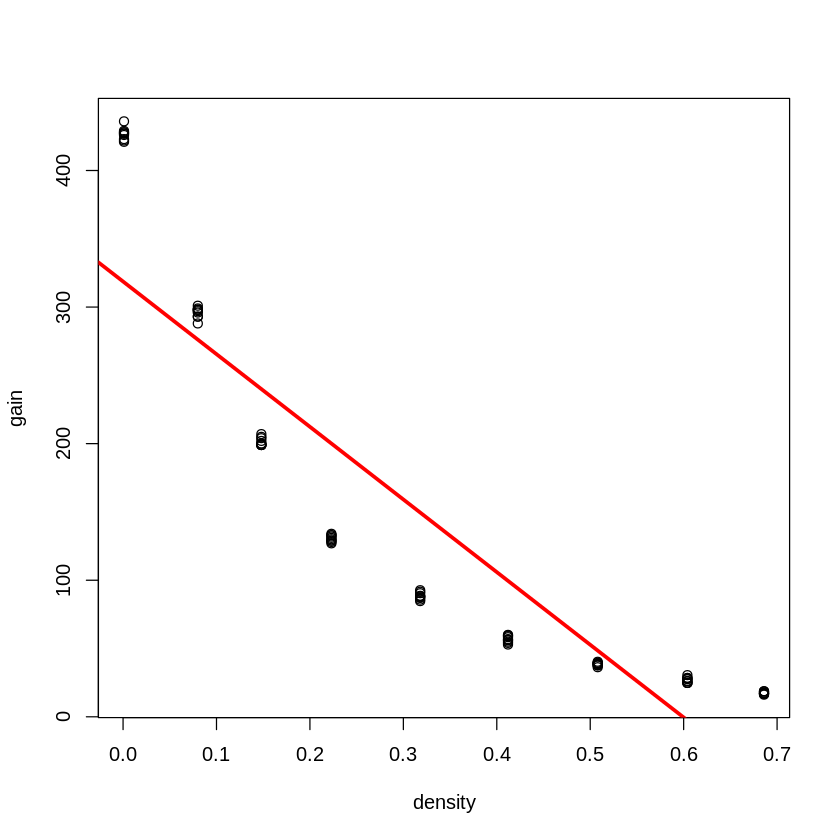

In [ ]:
plot(data)
lm_gain_density = lm(data$gain ~ data$density)
abline(lm_gain_density, col = 'red', lwd = 3)

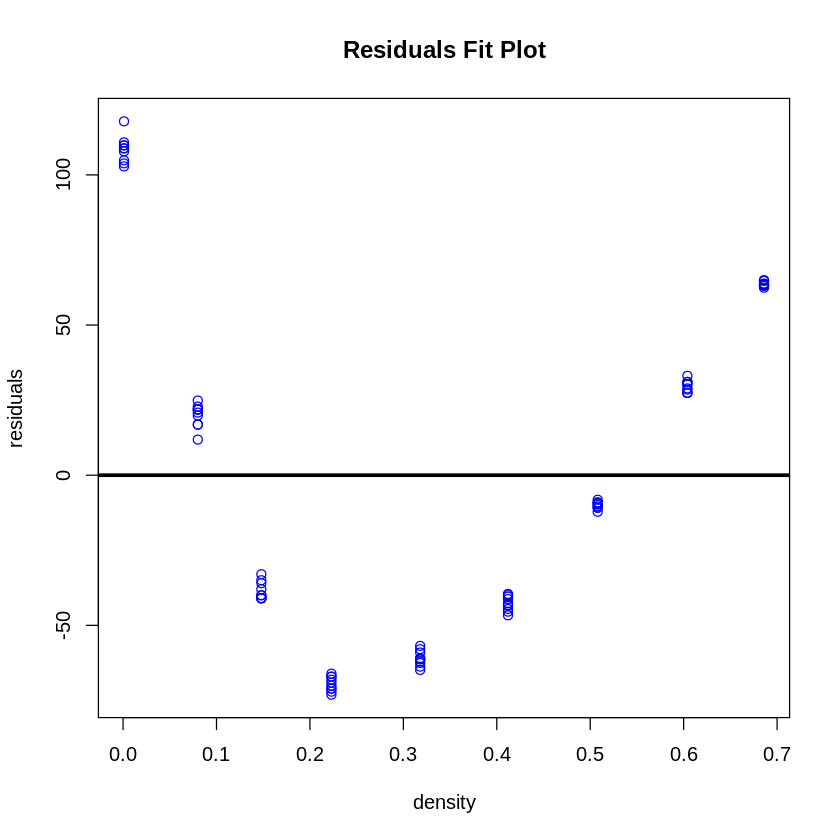

In [ ]:
plot(residuals(lm_gain_density) ~ data$density, main = "Residuals Fit Plot", ylab = "residuals", xlab = "density", col='blue')
abline(h = 0, col='black', lwd = 3)

In [ ]:
summary(lm_gain_density)


Call:
lm(formula = data$gain ~ data$density)

Residuals:
   Min     1Q Median     3Q    Max 
-73.08 -44.29  -9.72  30.82 117.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    318.70      10.79   29.54   <2e-16 ***
data$density  -531.95      26.95  -19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 57.54 on 88 degrees of freedom
Multiple R-squared:  0.8157,	Adjusted R-squared:  0.8136 
F-statistic: 389.5 on 1 and 88 DF,  p-value: < 2.2e-16


In [ ]:
anova(lm_gain_density)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
data$density,1,1289408,1289407.711,389.4756,4.518581e-34
Residuals,88,291335,3310.625,NA,NA


Conclusion:
- Scatter plot pattern
- Residual plot pattern
- Why we need a log transformation: From the histogram, we observed that the dataset is highly right-skewed. The scatter plot shows a non-linear pattern and the residual fit plot shows that the residuals are not randomly scattered around the 0-line and it does not form a "horizontal band" along the 0-line. This shows that a linear relationship is not supported and the variability of error terms is large. This indicates that the variables must be transformed to obtain a normalized dataset and minimize the errors

# Data transformation

In [ ]:
#we will apply log transformation on the dataset
#added log(gain) and log(density) column to the dataframe
data_with_log = cbind(data, log_gain = log(data$gain), log_density = log(data$density))
data_with_log

density,gain,log_gain,log_density
<dbl>,<dbl>,<dbl>,<dbl>
0.686,17.6,2.867899,-0.3768777
0.686,17.3,2.850707,-0.3768777
0.686,16.9,2.827314,-0.3768777
0.686,16.2,2.785011,-0.3768777
0.686,17.1,2.839078,-0.3768777
0.686,18.5,2.917771,-0.3768777
0.686,18.7,2.928524,-0.3768777
0.686,17.4,2.856470,-0.3768777
0.686,18.6,2.923162,-0.3768777


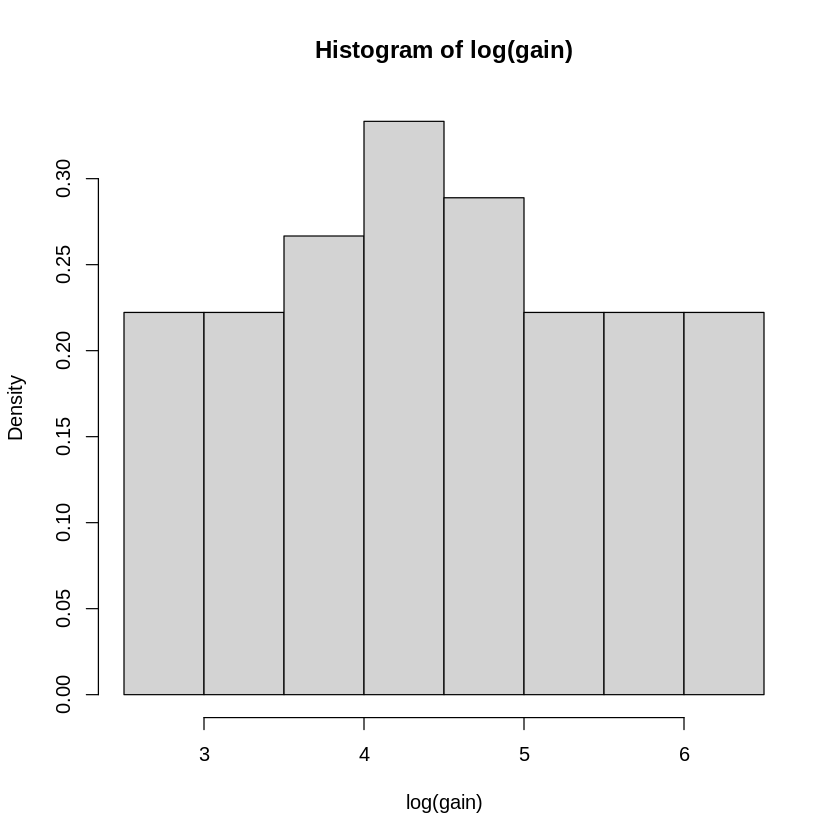

In [ ]:
hist(data_with_log$log_gain, freq = FALSE, main = "Histogram of log(gain)", xlab = "log(gain)")

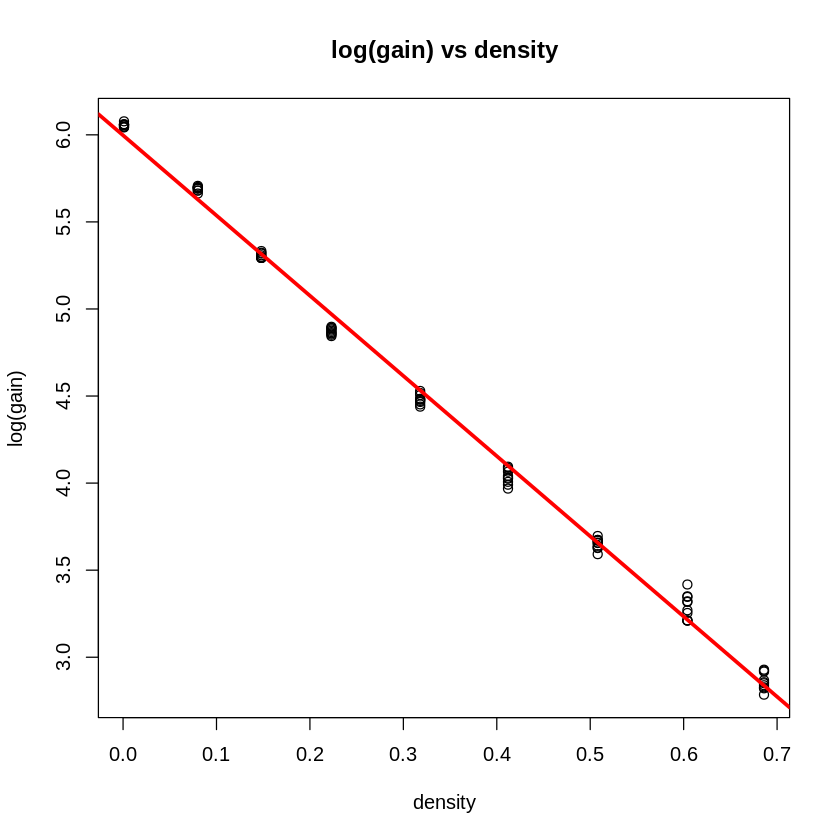

In [ ]:
#let's first try with scatter plot of log(gain) vs density
plot(data_with_log$log_gain ~ data_with_log$density, main = "log(gain) vs density", ylab = "log(gain)", xlab = "density")
lm_log_gain_density = lm(data_with_log$log_gain ~ data_with_log$density)
abline(lm_log_gain_density, col = 'red', lwd = 3)

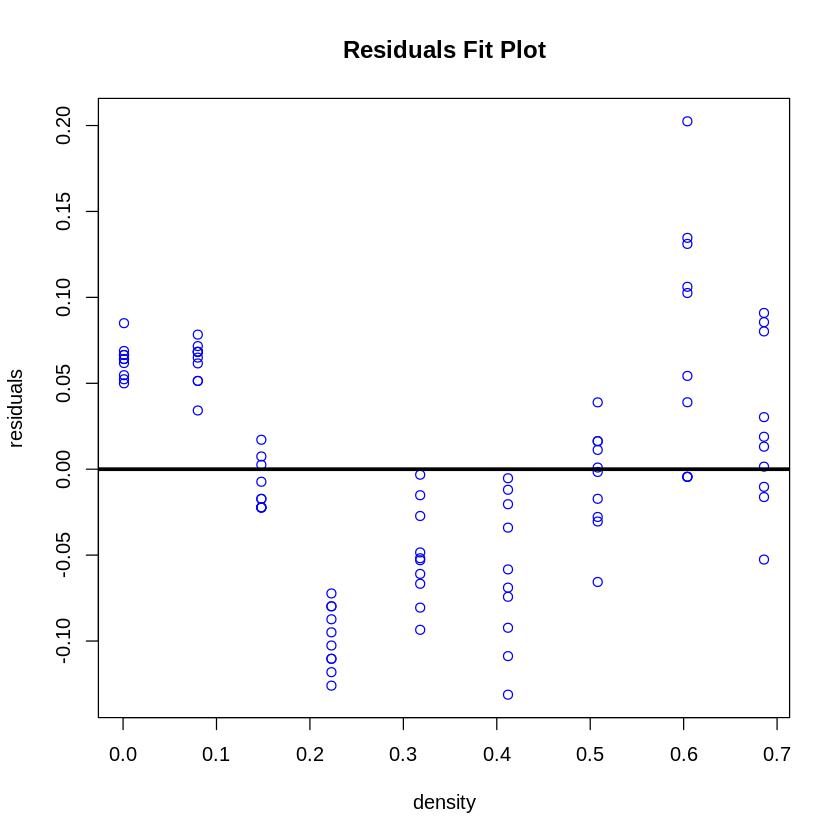

In [ ]:
#residual fit (to do)
plot(residuals(lm_log_gain_density) ~ data_with_log$density, main = "Residuals Fit Plot", ylab = "residuals", xlab = "density", col='blue')
abline(h = 0, col='black', lwd = 3)

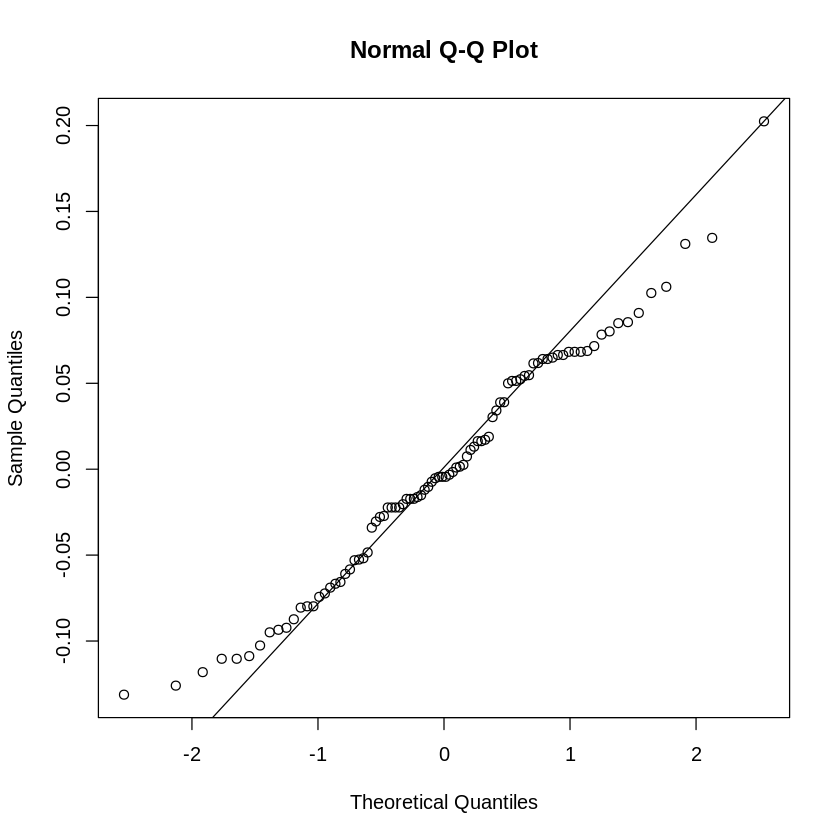

In [ ]:
qqnorm(residuals(lm_log_gain_density))
qqline(residuals(lm_log_gain_density))

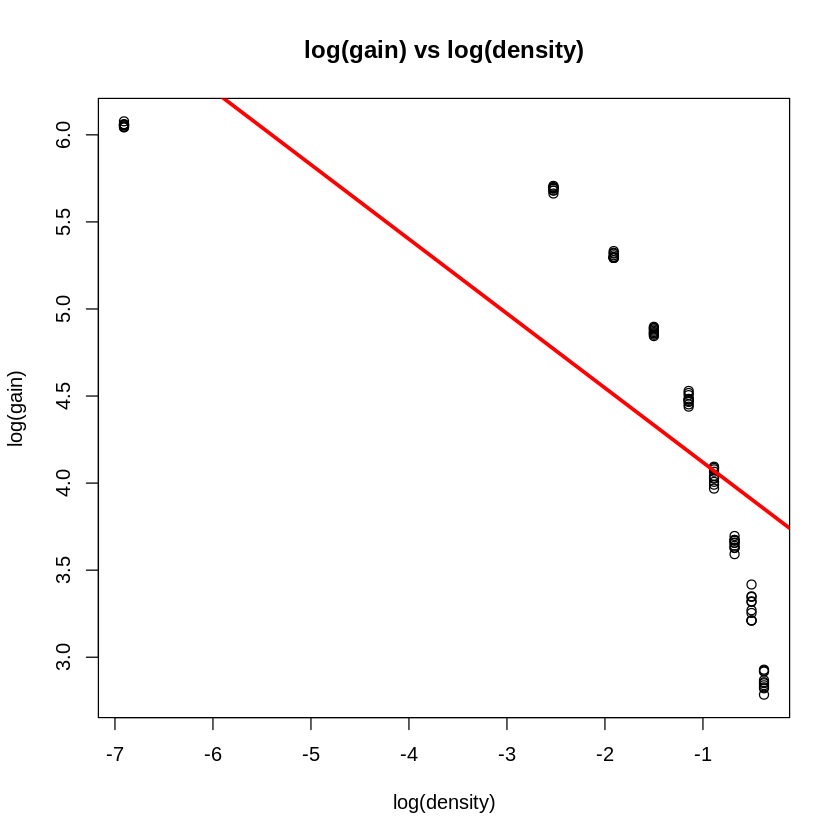

In [ ]:
#then we observe the scatter plot of log(gain) vs log(density)
plot(data_with_log$log_gain ~ data_with_log$log_density, main = "log(gain) vs log(density)", ylab = "log(gain)", xlab = "log(density)")
lm_log_gain_log_density = lm(data_with_log$log_gain ~ data_with_log$log_density)
abline(lm_log_gain_log_density, col = 'red', lwd = 3)

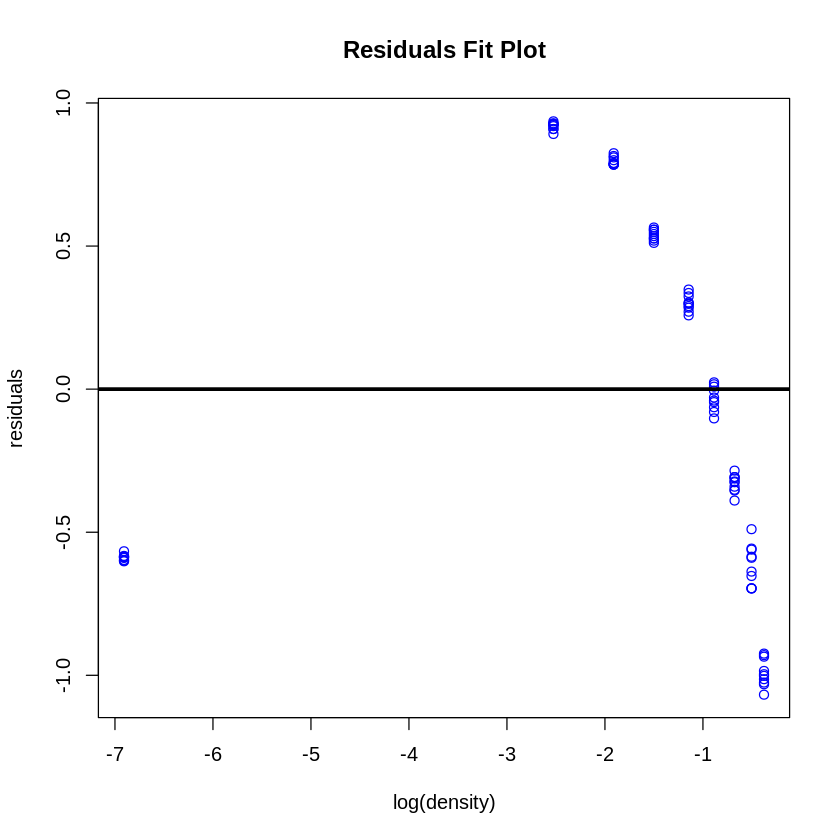

In [ ]:
#residual fit (to do)
plot(residuals(lm_log_gain_log_density) ~ data_with_log$log_density, main = "Residuals Fit Plot", ylab = "residuals", xlab = "log(density)", col='blue')
abline(h = 0, col='black', lwd = 3)
#justify which one we gonna use as final model

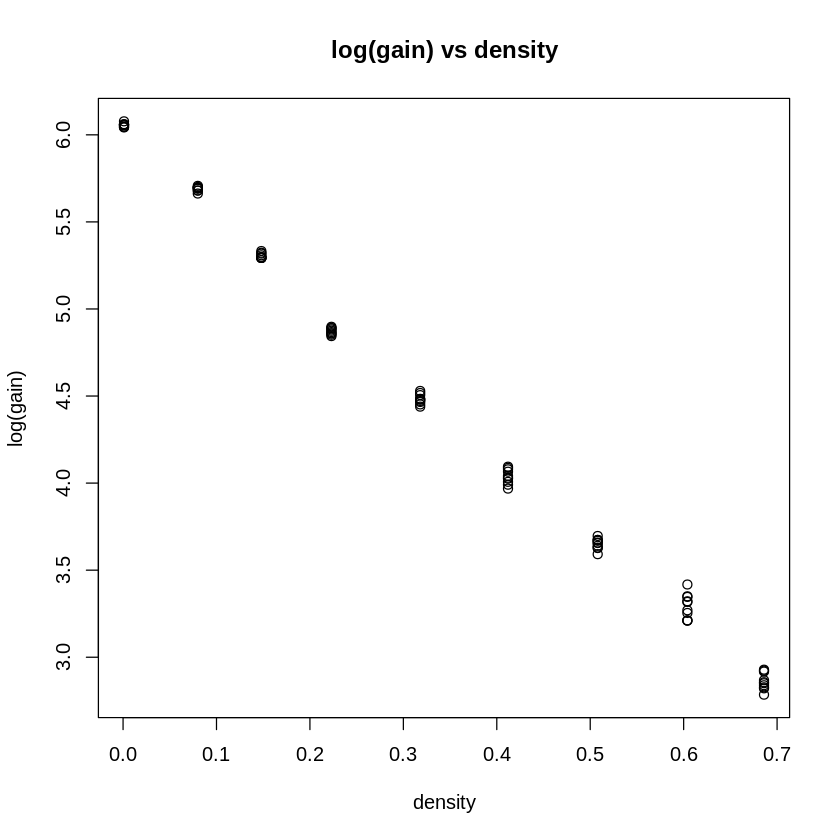

In [ ]:
#repeat from Question 2 to see the scatterplot again (for no reason :])

plot(data_with_log$log_gain ~ data_with_log$density, main = "log(gain) vs density", ylab = "log(gain)", xlab = "density")

In [ ]:
# woah! R^2 jumped to 0.9958 instead of what it was in Question 1
# formula for me was y = 5.99 - 4.61x, where x = density
summary(lm_log_gain_density)


Call:
lm(formula = data_with_log$log_gain ~ data_with_log$density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.131216 -0.052396 -0.004436  0.054607  0.202447 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            5.99727    0.01274   470.8   <2e-16 ***
data_with_log$density -4.60594    0.03182  -144.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06792 on 88 degrees of freedom
Multiple R-squared:  0.9958,	Adjusted R-squared:  0.9958 
F-statistic: 2.096e+04 on 1 and 88 DF,  p-value: < 2.2e-16


In [ ]:
# Going to jitter this transformed data's density (not the original/raw data) ONCE
# have to use abs() as negative densities don't make sense in real life
jittered_density = abs(jitter(data_with_log$density))
head(jittered_density)

[1] 0.6801010 0.6829676 0.6889404 0.6892765 0.6992322 0.6971872

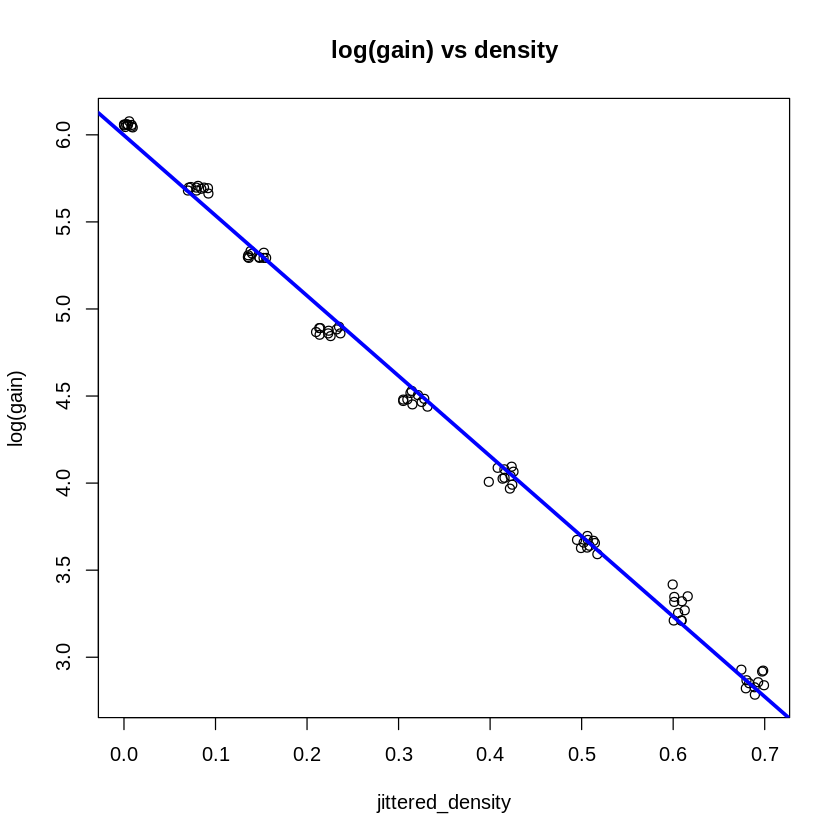

In [ ]:
# OLD linear model in blue
plot(data_with_log$log_gain ~ jittered_density, main = "log(gain) vs density", ylab = "log(gain)", xlab = "jittered_density")
abline(lm_log_gain_density, col = 'blue', lwd = 3)


Call:
lm(formula = data_with_log$log_gain ~ jittered_density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.164931 -0.049474 -0.006423  0.058685  0.180947 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.99569    0.01458   411.1   <2e-16 ***
jittered_density -4.58957    0.03633  -126.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07778 on 88 degrees of freedom
Multiple R-squared:  0.9945,	Adjusted R-squared:  0.9945 
F-statistic: 1.596e+04 on 1 and 88 DF,  p-value: < 2.2e-16


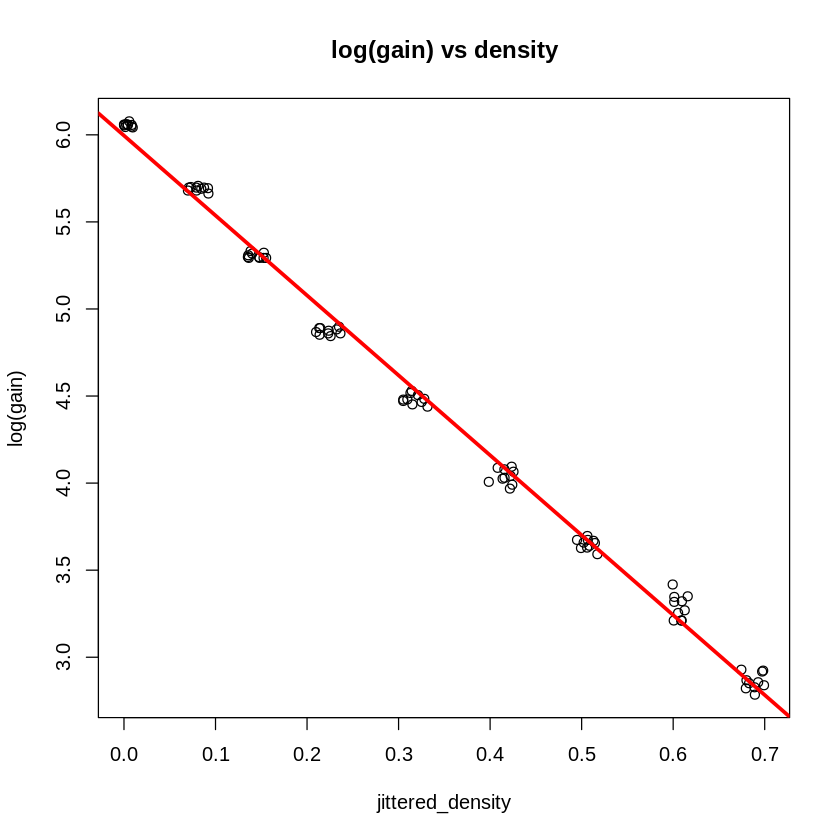

In [ ]:
# NEW linear model to fit the jitter
# formula for me was y = 6.00 - 4.61x, where x = density
plot(data_with_log$log_gain ~ jittered_density, main = "log(gain) vs density", ylab = "log(gain)", xlab = "jittered_density")
lm_log_gain_jittered_density = lm(data_with_log$log_gain ~ jittered_density)
abline(lm_log_gain_jittered_density, col = 'red', lwd = 3)
summary(lm_log_gain_jittered_density)

In [ ]:
lm_log_gain_jittered_density$coefficients[1] # gives the intercept
# lm_log_gain_jittered_density$coefficients[2] # gives the density coefficient

(Intercept) 
   5.995686

## Advanced Analysis: Another approach to test the robustness of data

In [ ]:
# Now conduct simulations n times, in which the original density is jittered each time. Record the coefficients each time.
n = 1000
differences_in_intercept = vector() # intercept when non-jittered - intercept when jittered
differences_in_density_coefficient = vector() # density when non-jittered - density when jittered
r_squared_for_jittered = vector() # records the R-squared values of the temporary post-jitter linear models
for (i in 1:n) {
  jittered_density_temp = abs(jitter(data_with_log$density))
  lm_log_gain_jittered_density_temp = lm(data_with_log$log_gain ~ jittered_density_temp)
  differences_in_intercept = append(differences_in_intercept, lm_log_gain_density$coefficients[1] - lm_log_gain_jittered_density_temp$coefficients[1])
  differences_in_density_coefficient = append(differences_in_density_coefficient, lm_log_gain_density$coefficients[2] - lm_log_gain_jittered_density_temp$coefficients[2])
  r_squared_for_jittered = append(r_squared_for_jittered, summary(lm_log_gain_jittered_density_temp)$r.square)
}
cat("Head of differences_in_intercept: ", head(differences_in_intercept), "\nHead of differencces_in_density_coefficient: ", head(differences_in_density_coefficient),
"\nHead of r-squareds: ", head(r_squared_for_jittered))

Head of differences_in_intercept:  -0.01425628 -0.009531346 -0.004351574 -0.006221099 -0.01412676 -0.01553183 
Head of differencces_in_density_coefficient:  0.01312483 0.04673005 -0.005912499 0.009936221 0.038916 0.02214551 
Head of r-squareds:  0.9945711 0.9942698 0.9940786 0.9948209 0.9949467 0.9944317

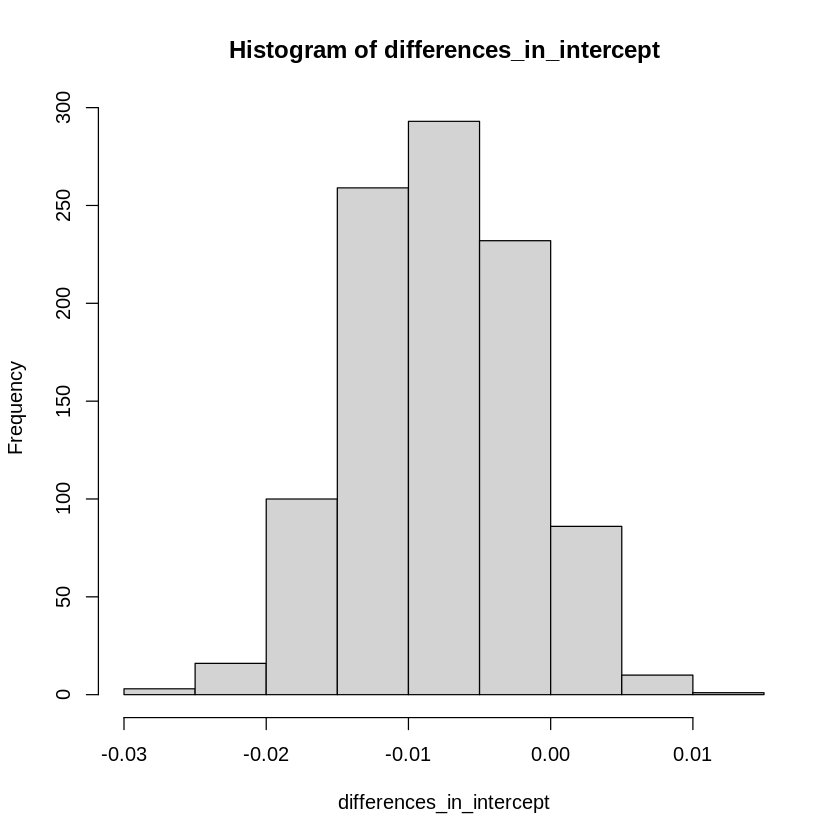

In [ ]:
hist(differences_in_intercept)

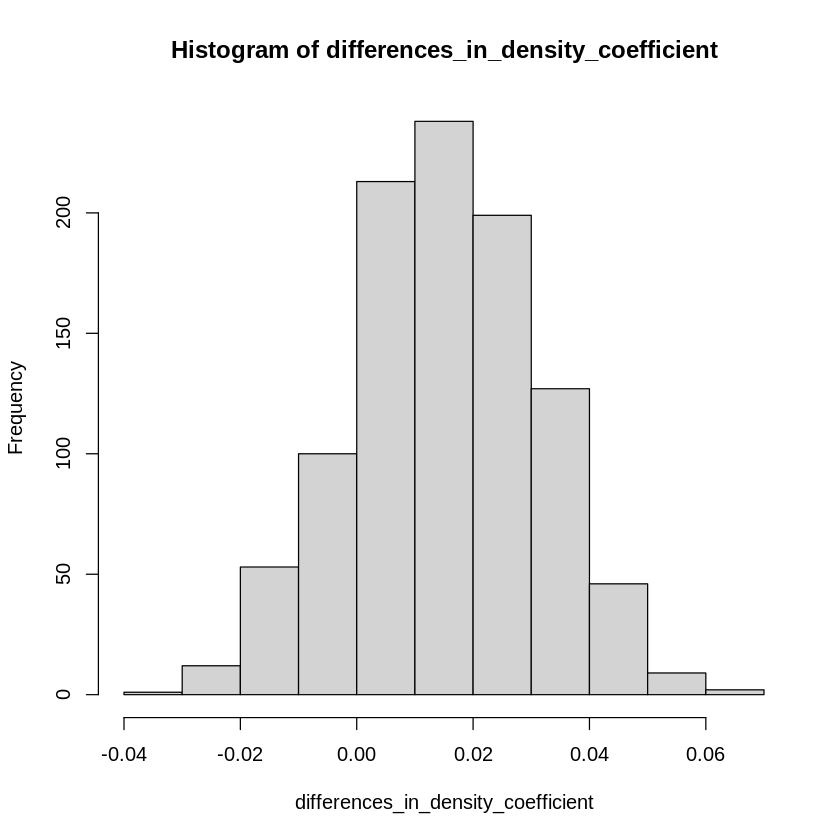

In [ ]:
hist(differences_in_density_coefficient)

I feel like differences_in_intercept and differences_in_density_coefficient are quite useless to look at; since the jitter() function randomly applies the jitter, the differences should have means around 0.0 as seen in the above histograms. I suppose it's worth to quickly note it (shows that the model coefficients are quite robust), but what's more important is the new R-squareds (below). Hopefully they will be close to the pre-jitter R-squared we found (0.9958).

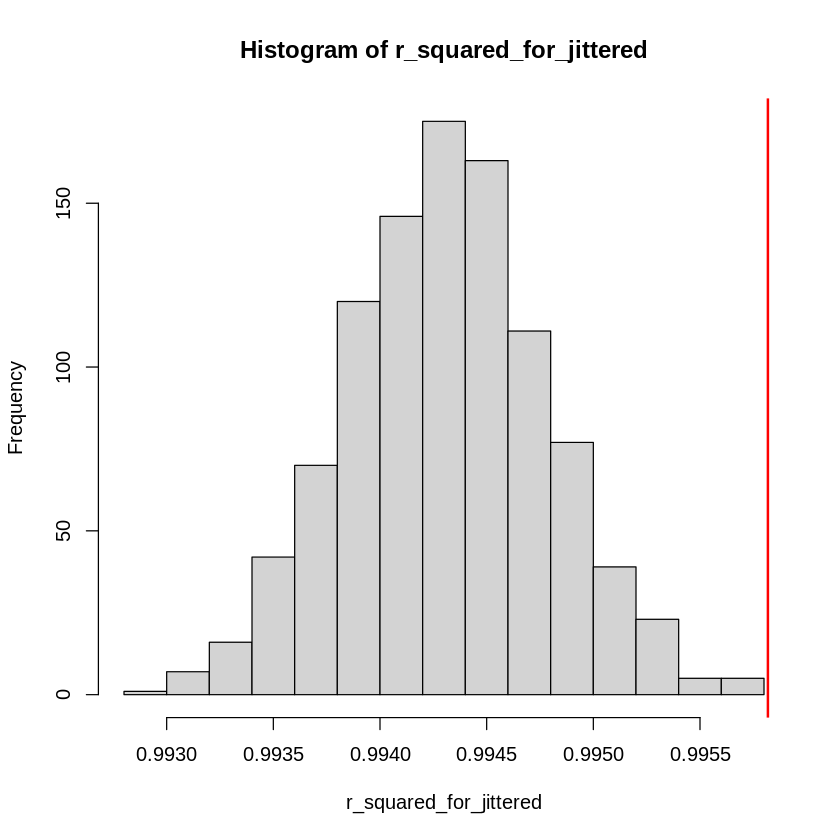

In [ ]:
hist(r_squared_for_jittered)
# plot original (pre-jitter) r-squared
observed_r_squared = summary(lm_log_gain_density)$r.square
abline(v=observed_r_squared, lwd = 2, col = 'red')

In [ ]:
# Interesting... let's find the chance of this happening.
values_over_observed_r_squared = r_squared_for_jittered >= observed_r_squared
num_values_over_observed_r_squared = sum(values_over_observed_r_squared) # this number was at or near zero for me
p_value_q3 = num_values_over_observed_r_squared / n
p_value_q3 # it may not be proper to call this a p-value, but it is a probability

[1] 0

In [ ]:
min(r_squared_for_jittered)

[1] 0.9929194

## Advanced Analysis Conclusion:

The intercept and coefficients of our linear model are quite robust and will not drastically change if the data presented (in our case, the jittered data) is slightly different from our [transformed] data.

The probability that we would observe the same or higher R-squared value than what it was pre-jitter (0.9958) is 0%. Our linear model will not fit similar data as well as it did. **It will still fit it quite well, however, at R^2 > 0.9925. Thus, a linear model is a good fit for our [transformed] data.**

Something for further analysis would be adjusting how much jitter occurs each time. I just used the default jitter intensity, but perhaps try other intensities too.

In [ ]:
# let's run a single simulation in which jitter is done 100 times on itself
n_2 = 100
differences_in_intercept_2 = vector() # intercept when non-jittered - intercept when jittered
differences_in_density_coefficient_2 = vector() # density when non-jittered - density when jittered
r_squared_for_jittered_2 = vector() # records the R-squared values of the temporary post-jitter linear models
jittered_density_temp = abs(jitter(data_with_log$density))
for (i in 1:n) {
  jittered_density_temp = abs(jitter(jittered_density_temp))
  lm_log_gain_jittered_density_temp = lm(data_with_log$log_gain ~ jittered_density_temp)
  differences_in_intercept_2 = append(differences_in_intercept_2, lm_log_gain_density$coefficients[1] - lm_log_gain_jittered_density_temp$coefficients[1])
  differences_in_density_coefficient_2 = append(differences_in_density_coefficient_2, lm_log_gain_density$coefficients[2] - lm_log_gain_jittered_density_temp$coefficients[2])
  r_squared_for_jittered_2 = append(r_squared_for_jittered_2, summary(lm_log_gain_jittered_density_temp)$r.square)
}
cat("Head of differences_in_intercept: ", head(differences_in_intercept_2), "\nHead of differencces_in_density_coefficient: ", head(differences_in_density_coefficient_2),
"\nHead of r-squareds: ", head(r_squared_for_jittered_2))

Head of differences_in_intercept:  -0.007709723 -0.007717604 -0.007731377 -0.007739518 -0.007741473 -0.007768994 
Head of differencces_in_density_coefficient:  0.02480355 0.02482238 0.02485778 0.0248799 0.0248758 0.02493607 
Head of r-squareds:  0.9943726 0.9943723 0.9943712 0.9943711 0.9943712 0.994371


Call:
lm(formula = data_with_log$log_gain ~ jittered_density_temp)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.175500 -0.058490  0.006325  0.052970  0.164687 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.00475    0.01485   404.3   <2e-16 ***
jittered_density_temp -4.63099    0.03719  -124.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07889 on 88 degrees of freedom
Multiple R-squared:  0.9944,	Adjusted R-squared:  0.9943 
F-statistic: 1.551e+04 on 1 and 88 DF,  p-value: < 2.2e-16


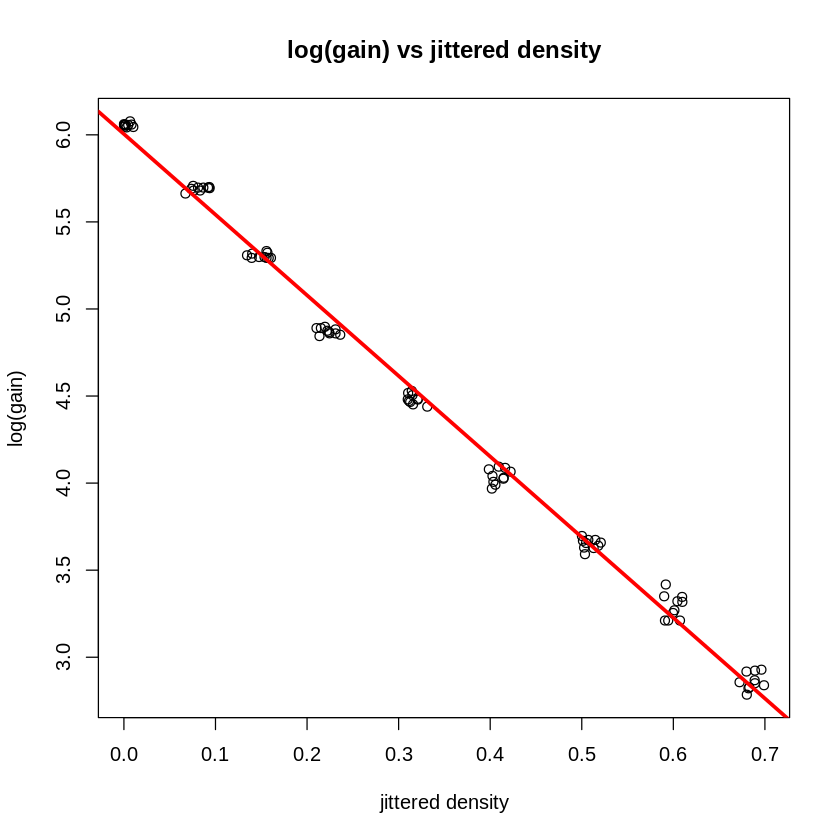

In [ ]:
# what does the density look like now?
plot(data_with_log$log_gain ~ jittered_density_temp, main = "log(gain) vs jittered density", ylab = "log(gain)", xlab = "jittered density")
lm_log_gain_multi_jittered_density = lm(data_with_log$log_gain ~ jittered_density_temp)
abline(lm_log_gain_multi_jittered_density, col = 'red', lwd = 3)
summary(lm_log_gain_multi_jittered_density)

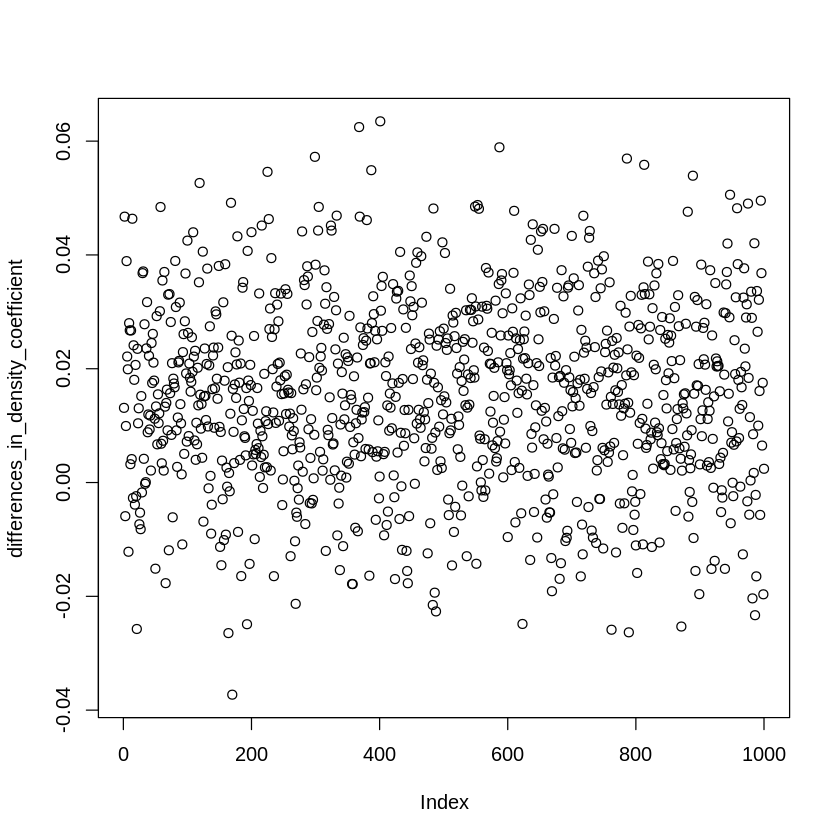

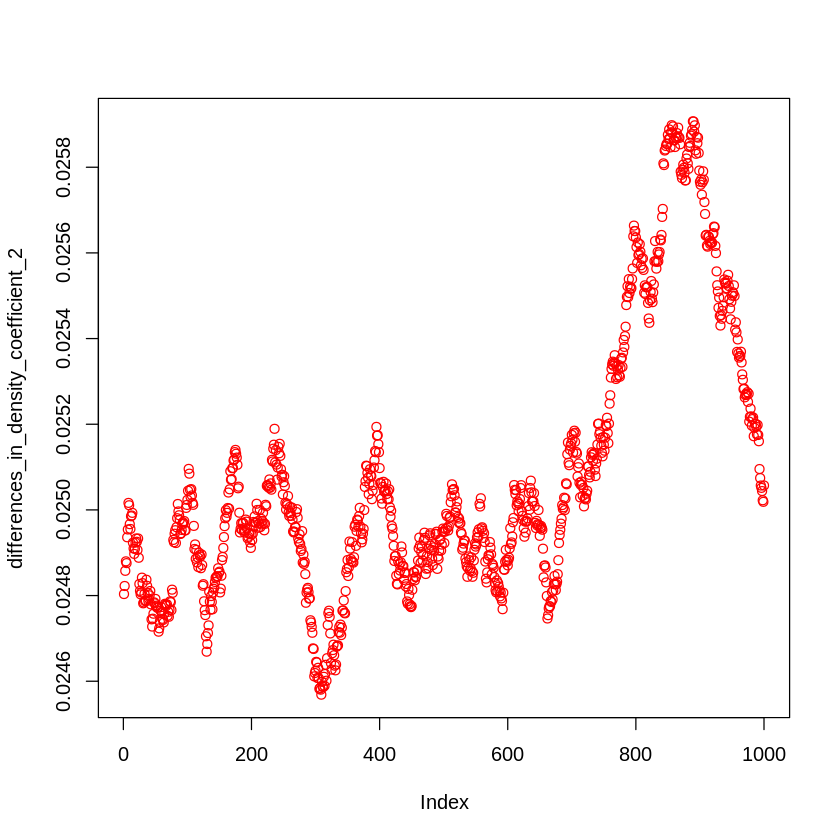

In [ ]:
plot(differences_in_density_coefficient) # what happens when you jitter only once
plot(differences_in_density_coefficient_2, col='red') # what happens when you jitter the same thing over and over

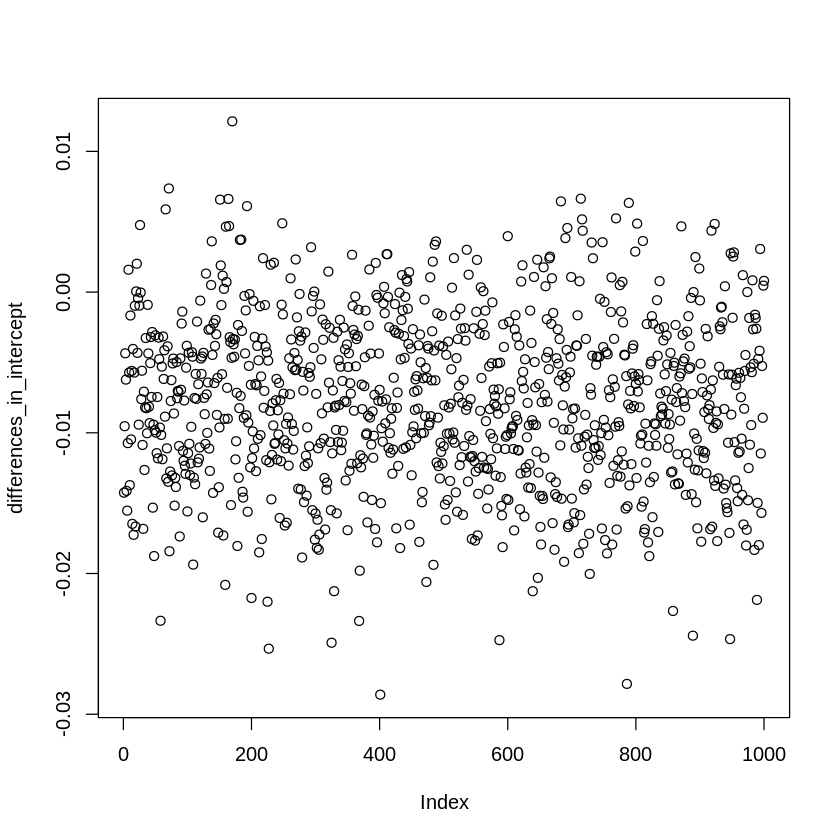

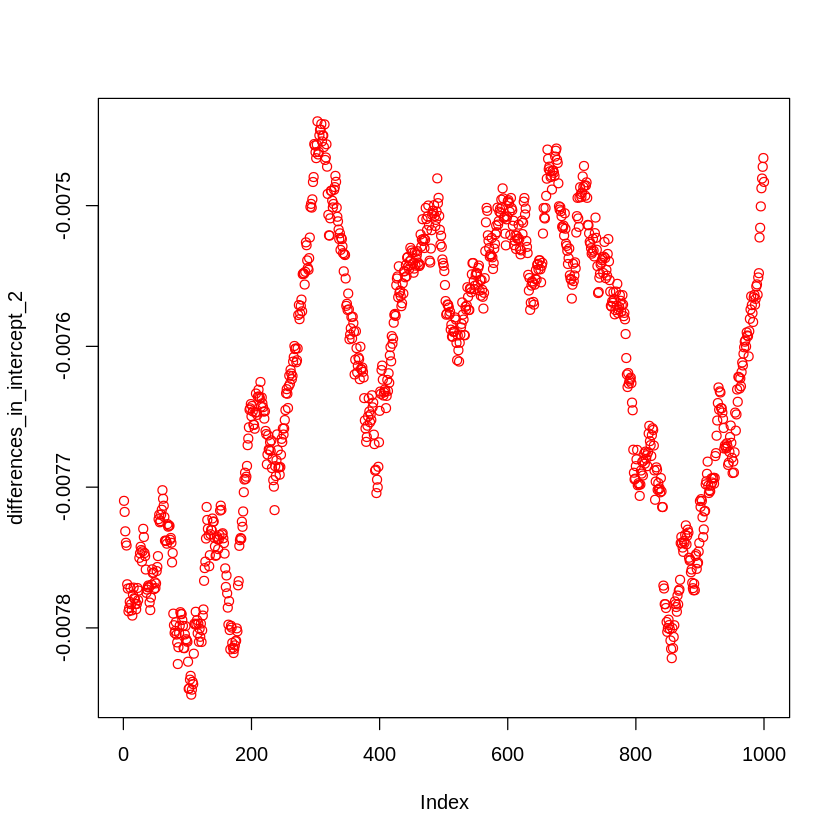

In [ ]:
plot(differences_in_intercept)
plot(differences_in_intercept_2, col = 'red')

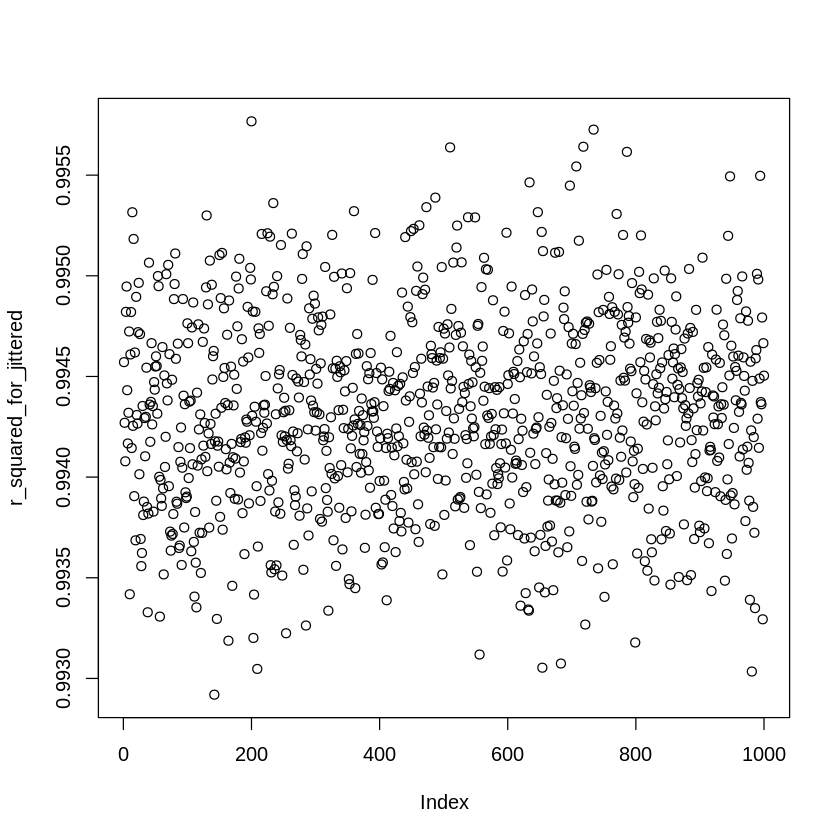

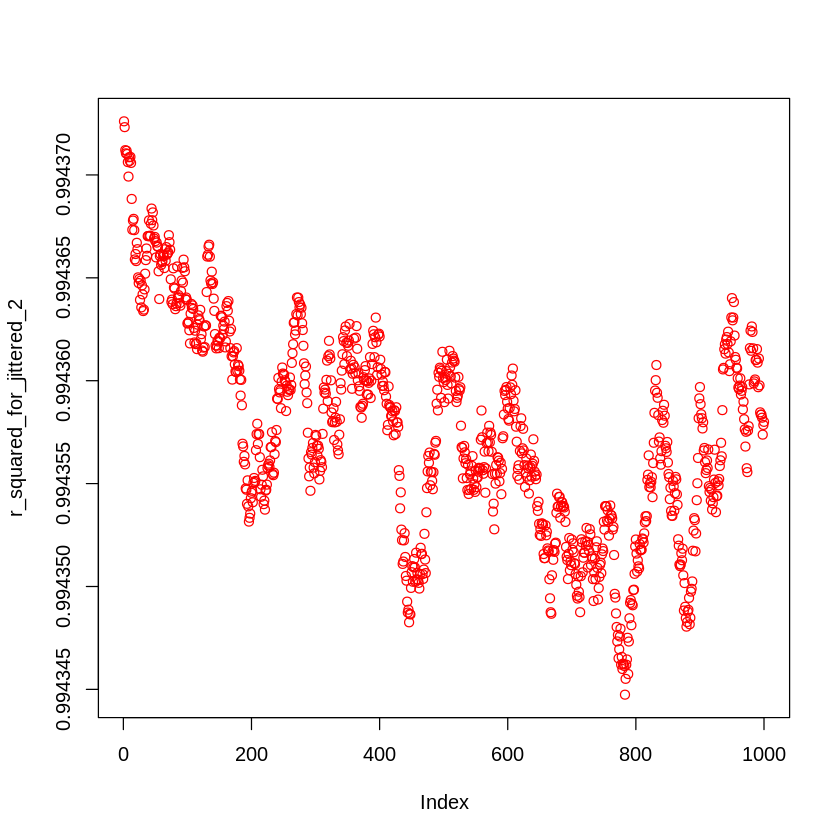

In [ ]:
plot(r_squared_for_jittered)
plot(r_squared_for_jittered_2,col = 'red')

Jittering the same thing over and over again produces non-uniform scatterplots.

# Building a linear model to predict gains given density of snow

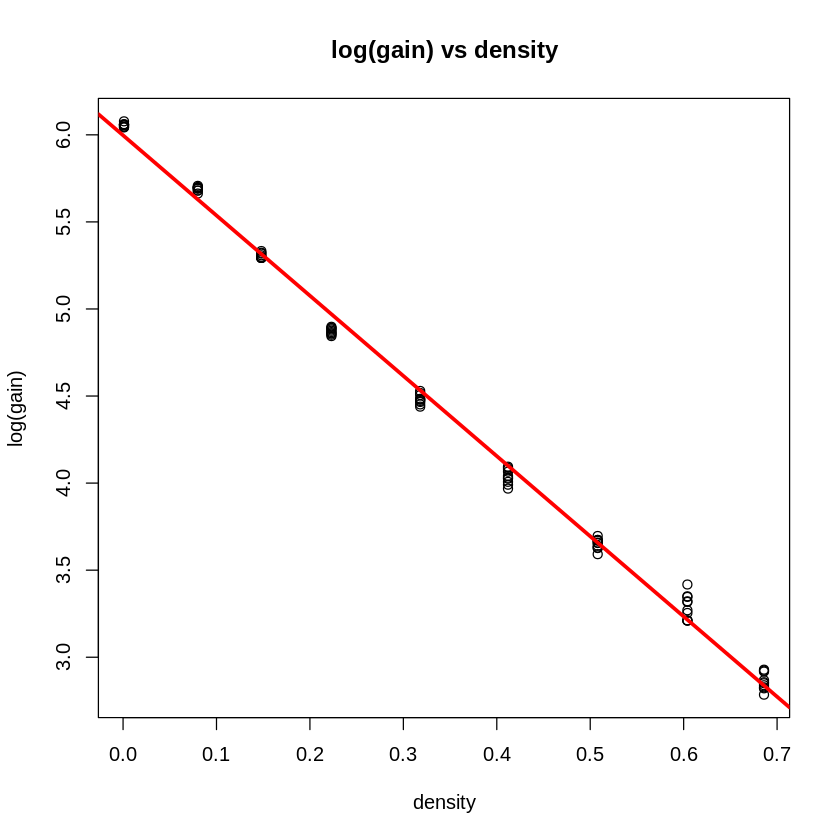

In [ ]:
# using the non-jittered model
plot(data_with_log$log_gain ~ data_with_log$density, main = "log(gain) vs density", ylab = "log(gain)", xlab = "density")
abline(lm_log_gain_density, col = 'red', lwd = 3)

Gain at purple line:  4.472189 
Top red line:  4.692362 
Bottom red line: 4.252015 
Top blue line (cannot be seen) 6.56094 
Bottom blue line (cannot be seen) 2.383438

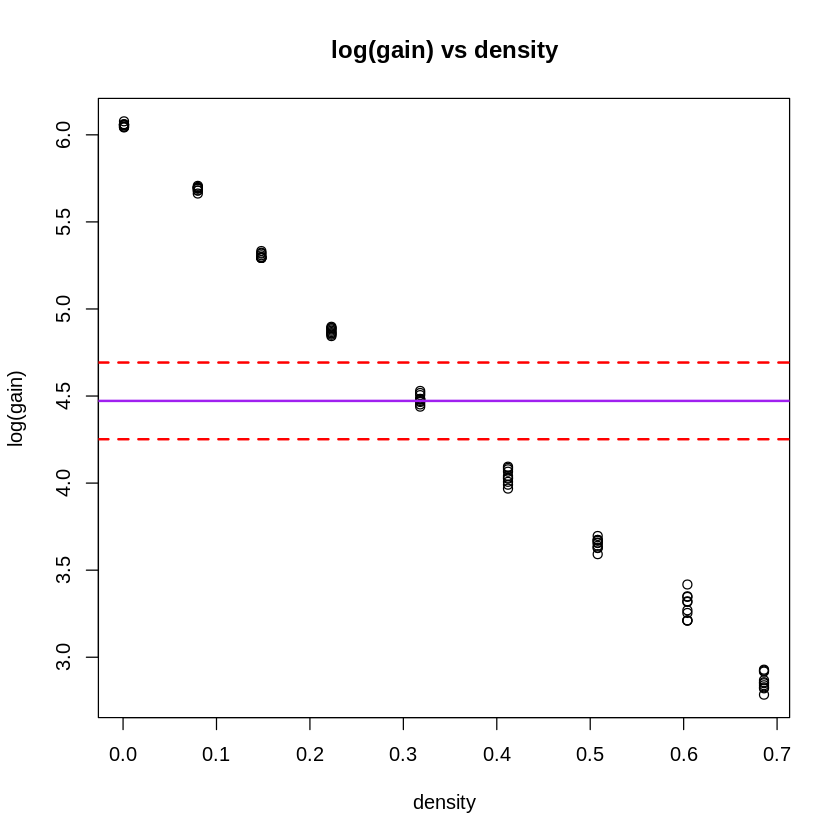

In [ ]:
# Assuming no covariates, using the same method in Chp5.R
n_rows = nrow(data_with_log)
plot(data_with_log$log_gain ~ data_with_log$density, main = "log(gain) vs density", ylab = "log(gain)", xlab = "density")
abline(h = mean(data_with_log$log_gain), lwd = 2, col = 'purple') # point estimate

abline(h = mean(data_with_log$log_gain) + 2*sd(data_with_log$log_gain)/sqrt(n_rows), lwd = 2, lty = 2, col = 'red')
abline(h = mean(data_with_log$log_gain) - 2*sd(data_with_log$log_gain)/sqrt(n_rows), lwd = 2, lty = 2, col = 'red')
abline(h = mean(data_with_log$log_gain) + 2*sd(data_with_log$log_gain), lwd = 2, lty = 2, col = 'blue')
abline(h = mean(data_with_log$log_gain) - 2*sd(data_with_log$log_gain), lwd = 2, lty = 2, col = 'blue')

cat("Gain at purple line: ", mean(data_with_log$log_gain), "\nTop red line: ", mean(data_with_log$log_gain) + 2*sd(data_with_log$log_gain)/sqrt(n_rows),
"\nBottom red line:", mean(data_with_log$log_gain) - 2*sd(data_with_log$log_gain)/sqrt(n_rows),
"\nTop blue line (cannot be seen)", mean(data_with_log$log_gain) + 2*sd(data_with_log$log_gain),
"\nBottom blue line (cannot be seen)", mean(data_with_log$log_gain) - 2*sd(data_with_log$log_gain))

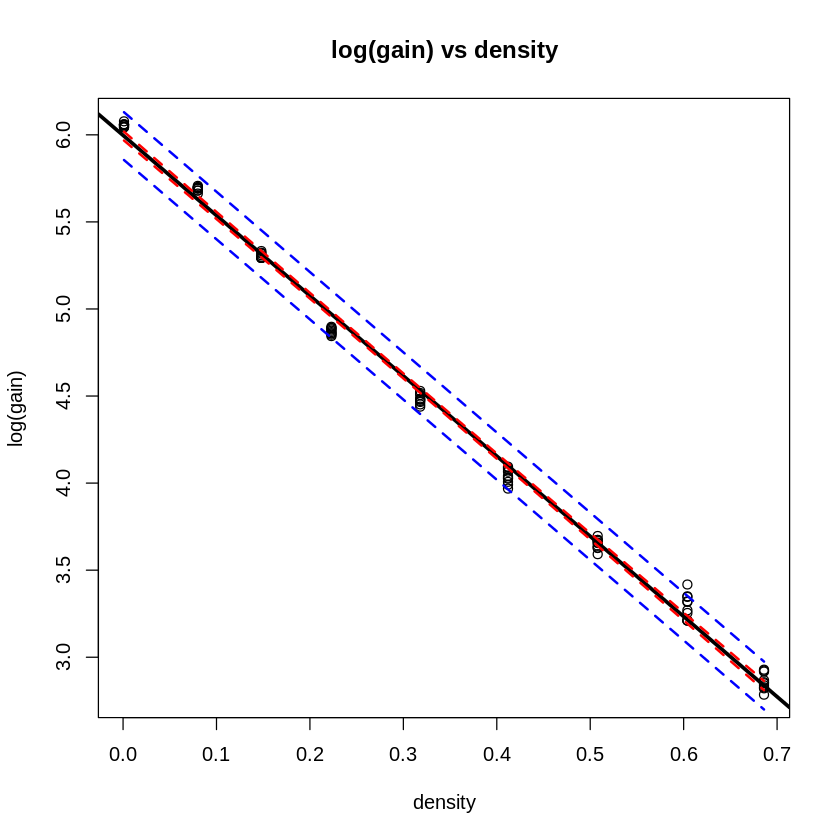

In [ ]:
# Assuming covariates

Y = data_with_log$log_gain
X = data_with_log$density
plot(Y ~ X, main = "log(gain) vs density", ylab = "log(gain)", xlab = "density")
lml = lm(Y ~ X)
abline(lm_log_gain_density, col = 'black', lwd = 3)
seq_X = seq(min(X), max(X), length.out = n_rows)

conf_bands = predict(lml, newdata = data.frame(X=seq_X), interval = 'confidence')
lines(conf_bands[,2] ~ seq_X, lwd = 2, lty = 2, col = 'red')
lines(conf_bands[,3] ~ seq_X, lwd = 2, lty = 2, col = 'red')
pred_bands = predict(lml, newdata = data.frame(X=seq_X), interval = 'prediction')
lines(pred_bands[,2] ~ seq_X, lwd = 2, lty = 2, col = 'blue')
lines(pred_bands[,3] ~ seq_X, lwd = 2, lty = 2, col = 'blue')

In [ ]:
# The confidence bands above are a bit hard to see. Here's the max and mins of both confidence lines
cat("Maximum lower confidence line: ", max(conf_bands[,2]))
cat("\nMinimum lower confidence line: ", min(conf_bands[,2]))
cat("\nMaximum upper confidence line: ", max(conf_bands[,3]))
cat("\nMinimum upper confidence line: ", min(conf_bands[,3]))

Maximum lower confidence line:  5.967399
Minimum lower confidence line:  2.811023
Maximum upper confidence line:  6.01792
Minimum upper confidence line:  2.864163

In [ ]:
# Additionally, here is the uncertainty range for the confidence and prediction bands:
uncertainty_conf_bands = conf_bands[,3] - conf_bands[,2]
uncertainty_pred_bands = pred_bands[,3] - pred_bands[,2]
cat("Uncertainty range given by the confidence bands: ", uncertainty_conf_bands,
"\nUncertainty range given by the prediction bands: ", uncertainty_pred_bands)

cat("\nMean uncertainty range for confidence bands: ", mean(uncertainty_conf_bands))
cat("\nMean uncertainty range for prediction bands: ", mean(uncertainty_pred_bands))

Uncertainty range given by the confidence bands:  0.05052131 0.04972008 0.04892509 0.04813665 0.04735509 0.04658075 0.045814 0.04505524 0.04430486 0.0435633 0.04283102 0.04210851 0.04139628 0.04069485 0.04000482 0.03932676 0.03866132 0.03800916 0.03737097 0.03674748 0.03613945 0.03554767 0.03497297 0.0344162 0.03387825 0.03336004 0.03286248 0.03238654 0.03193318 0.03150337 0.0310981 0.03071833 0.03036502 0.03003911 0.02974149 0.02947302 0.02923451 0.02902669 0.02885023 0.02870571 0.0285936 0.02851429 0.02846806 0.02845507 0.02847536 0.02852886 0.02861539 0.02873464 0.02888622 0.02906961 0.02928422 0.02952936 0.02980429 0.03010819 0.03044019 0.03079938 0.03118483 0.03159556 0.03203062 0.03248901 0.03296978 0.03347195 0.03399457 0.03453672 0.03509749 0.03567601 0.03627142 0.03688291 0.03750969 0.03815101 0.03880614 0.03947441 0.04015514 0.04084772 0.04155156 0.0422661 0.0429908 0.04372515 0.04446868 0.04522093 0.04598148 0.04674993 0.04752588 0.04830898 0.04909888 0.04989527 0.05069783 0

In [ ]:
# Predicting densities of 0.508 and 0.001

# another valid way is computing lm_log_gain_density$coefficients[1] + 0.508 * lm_log_gain_density$coefficients[2]

Y = data_with_log$log_gain
X = data_with_log$density
lml = lm(Y ~ X)

# the first value is the average prediction, second value is the lower bound, third is the upper bound
cat("Predicted log_gain for a density of 0.508: ", predict(lml, newdata=data.frame(X=0.508), interval = 'confidence'))

cat("\nPredicted log_gain for a density of 0.001: ", predict(lml, newdata=data.frame(X=0.001), interval = 'confidence'))

# convert log_gain back to gain with exp()
cat("\nPredicted gains for a density of 0.508: ", exp(predict(lml, newdata=data.frame(X=0.508), interval = 'confidence')))

cat("\nPredicted gains for a density of 0.001: ", exp(predict(lml, newdata=data.frame(X=0.001), interval = 'confidence')))

Predicted log_gain for a density of 0.508:  3.65745 3.639352 3.675547
Predicted log_gain for a density of 0.001:  5.99266 5.967399 6.01792
Predicted gains for a density of 0.508:  38.76236 38.06717 39.47024
Predicted gains for a density of 0.001:  400.4783 390.4887 410.7235

In [ ]:
cat("Actual gains for a density of 0.508: ",data_with_log$gain[data_with_log$density == 0.508], "; Mean = ", mean(data_with_log$gain[data_with_log$density == 0.508]))
cat("\nActual gains for a density of 0.001: ",data_with_log$gain[data_with_log$density == 0.001], "; Mean = ", mean(data_with_log$gain[data_with_log$density == 0.001]))

Actual gains for a density of 0.508:  39.4 37.6 38.1 37.7 36.3 38.7 39.4 38.8 39.2 40.3 ; Mean =  38.55
Actual gains for a density of 0.001:  423 421 422 428 436 427 426 428 427 429 ; Mean =  426.7

Our linear model predicts the gain for the given density of 0.508 more accurately than 0.001, in which the difference between the predicted and actual gain given density=0.508 is about |0.08|, and the difference given density = 0.001 is about |26.2|.

# Building a linear model that predicts density of snow given gains

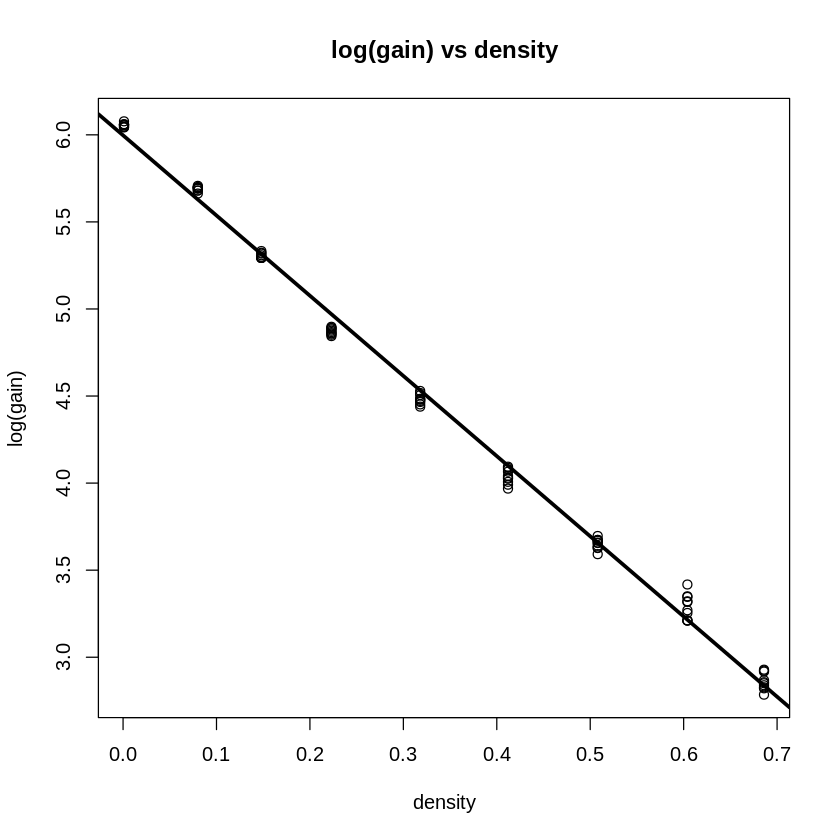

In [ ]:
# the line that we are going to invert

plot(data_with_log$log_gain ~ data_with_log$density, main = "log(gain) vs density", ylab = "log(gain)", xlab = "density")
abline(lm_log_gain_density, col = 'black', lwd = 3)

In [ ]:
# find out how to invert a linear model
# gonna do it manually by rearranging y = mx + b into x = (y-b)/m

# y = mx+b: log_gain = lm_log_gain_density$coefficients[2] * density + lm_log_gain_density$coefficients[1]
# x = (y-b)/m: density = (log_gain - lm_log_gain_density$coefficients[1]) / lm_log_gain_density$coefficients[2]

In [ ]:
# Find the density that corresponds to gain measurement 38.6
# Substituting in log_gain = log(38.6)
point_est_g1 = (log(38.6) - lm_log_gain_density$coefficients[1]) / lm_log_gain_density$coefficients[2]
cat("Point estimate of density given gain = 38.6: ", point_est_g1)

# going to use the same uncertainty ranges found in the previous problem in an odd way
half_of_uncertainty_conf_bands = mean(uncertainty_conf_bands)/2
half_of_uncertainty_pred_bands = mean(uncertainty_pred_bands)/2
cat("\nConfidence band range: [", point_est_g1 - half_of_uncertainty_conf_bands, ", ",
point_est_g1 + half_of_uncertainty_conf_bands, "]")
cat("\nPrediction band range: [", point_est_g1 - half_of_uncertainty_pred_bands, ", ",
point_est_g1 + half_of_uncertainty_pred_bands, "]")

Point estimate of density given gain = 38.6:  0.5089113
Confidence band range: [ 0.4902208 ,  0.5276017 ]
Prediction band range: [ 0.3726014 ,  0.6452212 ]

^ this is pretty close to the observed value 0.508

In [ ]:
# Find the density that corresponds to gain measurement 426.7
# Substituting in log_gain = log(426.7)
point_est_g2 = (log(426.7) - lm_log_gain_density$coefficients[1]) / lm_log_gain_density$coefficients[2]
cat("Point estimate of density given gain = 426.7: ", point_est_g2)

cat("\nConfidence band range: [", point_est_g2 - half_of_uncertainty_conf_bands, ", ",
point_est_g2 + half_of_uncertainty_conf_bands, "]")
cat("\nPrediction band range: [", point_est_g2 - half_of_uncertainty_pred_bands, ", ",
point_est_g2 + half_of_uncertainty_pred_bands, "]")

Point estimate of density given gain = 426.7:  -0.01276954
Confidence band range: [ -0.03145998 ,  0.005920903 ]
Prediction band range: [ -0.1490794 ,  0.1235404 ]

^ It's impossible to get a negative density in real life. Moreover, the absolute value of this isn't as close to the actual density. Therefore, our [inverse] linear model doesn't work well when given large gains

In [ ]:
# the dataframe
head(data_with_log)

,density,gain,log_gain,log_density
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.686,17.6,2.867899,-0.3768777
2,0.686,17.3,2.850707,-0.3768777
3,0.686,16.9,2.827314,-0.3768777
4,0.686,16.2,2.785011,-0.3768777
5,0.686,17.1,2.839078,-0.3768777
6,0.686,18.5,2.917771,-0.3768777


In [ ]:
# throw out all ROWS that had density == 0.508
data_with_log_scrubbed_0508 = data_with_log[which(data_with_log['density'] != 0.508),]
head(data_with_log_scrubbed_0508)

,density,gain,log_gain,log_density
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.686,17.6,2.867899,-0.3768777
2,0.686,17.3,2.850707,-0.3768777
3,0.686,16.9,2.827314,-0.3768777
4,0.686,16.2,2.785011,-0.3768777
5,0.686,17.1,2.839078,-0.3768777
6,0.686,18.5,2.917771,-0.3768777


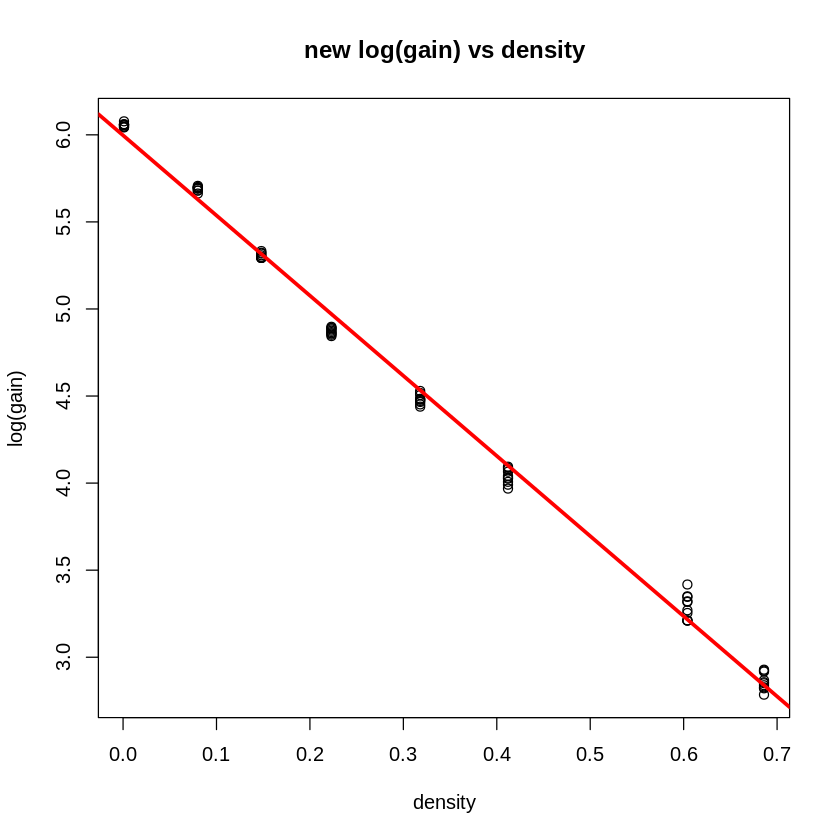

In [ ]:
# create a new linear model with this scrubbed data
plot(data_with_log_scrubbed_0508$log_gain ~ data_with_log_scrubbed_0508$density, main = "new log(gain) vs density", ylab = "log(gain)", xlab = "density")
lm_log_gain_density_scrubbed_0508 = lm(data_with_log_scrubbed_0508$log_gain ~ data_with_log_scrubbed_0508$density)
abline(lm_log_gain_density_scrubbed_0508, col = 'red', lwd = 3)

In [ ]:
summary(lm_log_gain_density_scrubbed_0508)


Call:
lm(formula = data_with_log_scrubbed_0508$log_gain ~ data_with_log_scrubbed_0508$density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.132241 -0.055616 -0.005997  0.062488  0.200886 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          5.99714    0.01339   447.8   <2e-16 ***
data_with_log_scrubbed_0508$density -4.60315    0.03481  -132.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07138 on 78 degrees of freedom
Multiple R-squared:  0.9956,	Adjusted R-squared:  0.9955 
F-statistic: 1.749e+04 on 1 and 78 DF,  p-value: < 2.2e-16


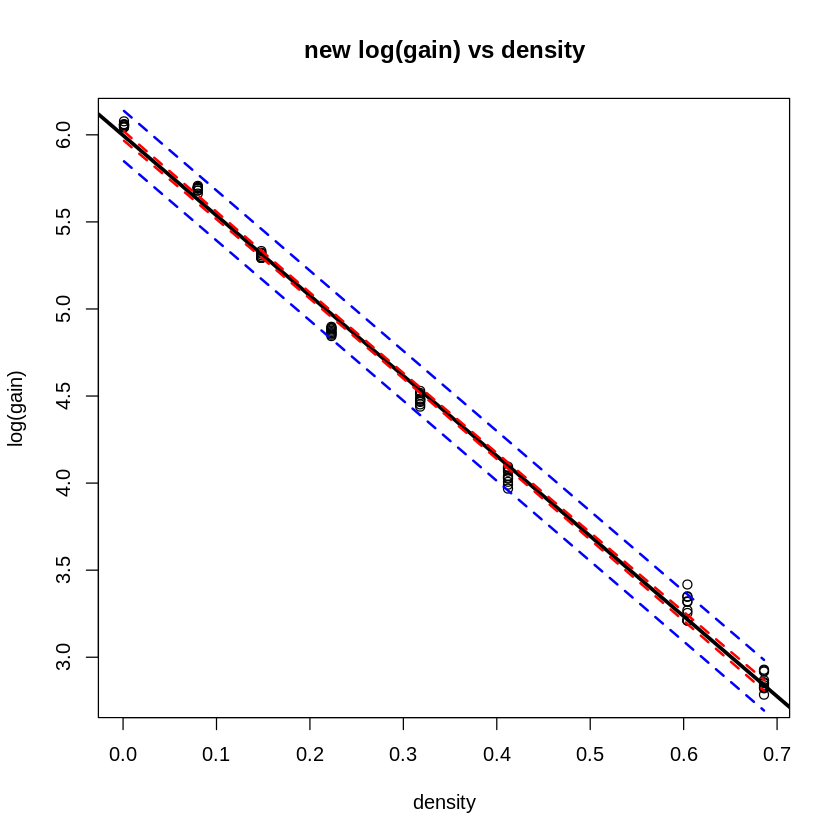

In [ ]:
# ^ Not too much change in the intercept and slope.

# Find the confidence & prediction bands from Q4, assuming covariates
n_rows = nrow(data_with_log_scrubbed_0508)
Y = data_with_log_scrubbed_0508$log_gain
X = data_with_log_scrubbed_0508$density
plot(Y ~ X, main = "new log(gain) vs density", ylab = "log(gain)", xlab = "density")
lml = lm(Y ~ X)
abline(lm_log_gain_density_scrubbed_0508, col = 'black', lwd = 3)
seq_X = seq(min(X), max(X), length.out = n_rows)

conf_bands_0508 = predict(lml, newdata = data.frame(X=seq_X), interval = 'confidence')
lines(conf_bands_0508[,2] ~ seq_X, lwd = 2, lty = 2, col = 'red')
lines(conf_bands_0508[,3] ~ seq_X, lwd = 2, lty = 2, col = 'red')
pred_bands_0508 = predict(lml, newdata = data.frame(X=seq_X), interval = 'prediction')
lines(pred_bands_0508[,2] ~ seq_X, lwd = 2, lty = 2, col = 'blue')
lines(pred_bands_0508[,3] ~ seq_X, lwd = 2, lty = 2, col = 'blue')

In [ ]:
uncertainty_conf_bands_0508 = conf_bands_0508[,3] - conf_bands_0508[,2]
uncertainty_pred_bands_0508 = pred_bands_0508[,3] - pred_bands_0508[,2]
cat("Uncertainty range given by the confidence bands: ", uncertainty_conf_bands_0508,
"\nUncertainty range given by the prediction bands: ", uncertainty_pred_bands_0508)

cat("\nMean uncertainty range for confidence bands: ", mean(uncertainty_conf_bands_0508))
cat("\nMean uncertainty range for prediction bands: ", mean(uncertainty_pred_bands_0508))

Uncertainty range given by the confidence bands:  0.05321563 0.05225652 0.05130764 0.05036956 0.04944289 0.04852829 0.04762645 0.04673811 0.04586406 0.04500512 0.04416219 0.04333619 0.04252811 0.041739 0.04096994 0.04022208 0.03949664 0.03879487 0.03811808 0.03746762 0.03684488 0.0362513 0.03568833 0.03515743 0.03466009 0.03419777 0.0337719 0.03338388 0.03303505 0.03272665 0.03245984 0.03223566 0.03205499 0.03191858 0.031827 0.03178063 0.03177966 0.03182412 0.0319138 0.03204832 0.03222712 0.03244948 0.0327145 0.03302116 0.03336831 0.03375469 0.03417899 0.0346398 0.03513568 0.03566519 0.03622683 0.03681915 0.03744068 0.03809 0.03876571 0.03946644 0.04019091 0.04093784 0.04170602 0.04249431 0.04330161 0.04412687 0.04496911 0.04582738 0.04670081 0.04758856 0.04848984 0.04940392 0.05033009 0.0512677 0.05221614 0.05317482 0.0541432 0.05512077 0.05610706 0.05710159 0.05810397 0.05911377 0.06013064 0.06115422 
Uncertainty range given by the prediction bands:  0.2891387 0.2889637 0.2887936 0.2

In [ ]:
# inverse-predict (interval estimate) the density of a block with gain = 38.6, just like in Q5

# Substituting in log_gain = log(38.6)
point_est_g3 = (log(38.6) - lm_log_gain_density_scrubbed_0508$coefficients[1]) / lm_log_gain_density_scrubbed_0508$coefficients[2]
cat("Point estimate of density given gain = 38.6: ", point_est_g3)

# going to use the same uncertainty ranges found in the previous cell in an odd way
half_of_uncertainty_conf_bands_0508 = mean(uncertainty_conf_bands_0508)/2
half_of_uncertainty_pred_bands_0508 = mean(uncertainty_pred_bands_0508)/2
cat("\nConfidence band range: [", point_est_g3 - half_of_uncertainty_conf_bands_0508, ", ",
point_est_g3 + half_of_uncertainty_conf_bands_0508, "]")
cat("\nPrediction band range: [", point_est_g3 - half_of_uncertainty_pred_bands_0508, ", ",
point_est_g3 + half_of_uncertainty_pred_bands_0508, "]")

Point estimate of density given gain = 38.6:  0.5091927
Confidence band range: [ 0.4883776 ,  0.5300078 ]
Prediction band range: [ 0.3655175 ,  0.6528679 ]

The actual density, 0.508, falls within both intervals.

I doubt that the rows with density = 0.508 were problematic. Let's try removing the rows with density = 0.001 instead.

In [ ]:
# throw out all ROWS that had density == 0.001
data_with_log_scrubbed_0001 = data_with_log[which(data_with_log['density'] != 0.001),]
head(data_with_log_scrubbed_0001)

,density,gain,log_gain,log_density
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.686,17.6,2.867899,-0.3768777
2,0.686,17.3,2.850707,-0.3768777
3,0.686,16.9,2.827314,-0.3768777
4,0.686,16.2,2.785011,-0.3768777
5,0.686,17.1,2.839078,-0.3768777
6,0.686,18.5,2.917771,-0.3768777


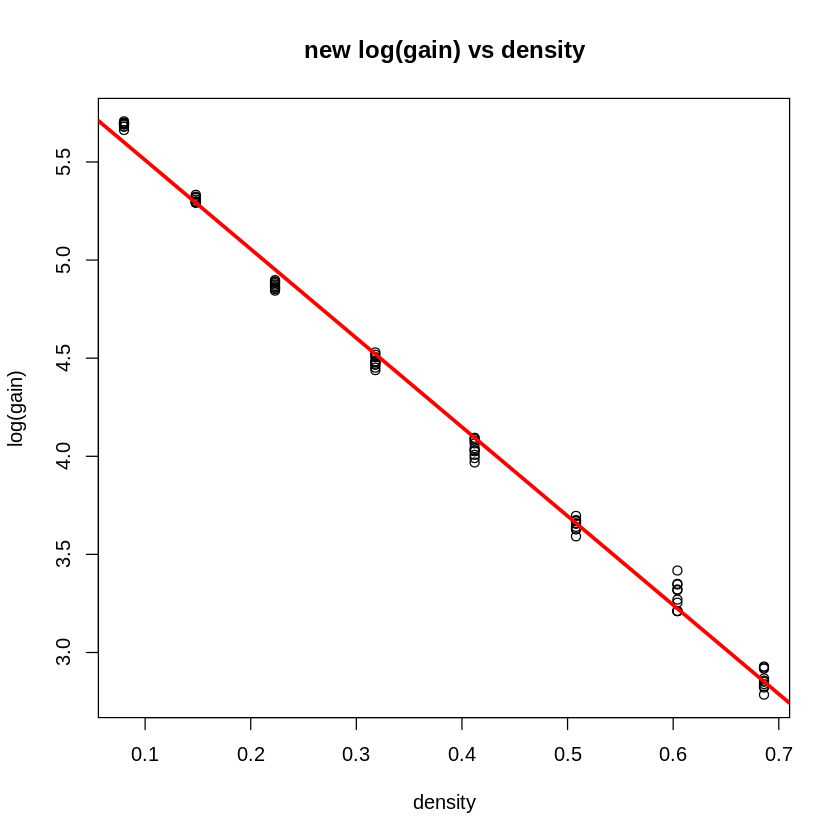

In [ ]:
# create a new linear model with this scrubbed data
plot(data_with_log_scrubbed_0001$log_gain ~ data_with_log_scrubbed_0001$density, main = "new log(gain) vs density", ylab = "log(gain)", xlab = "density")
lm_log_gain_density_scrubbed_0001 = lm(data_with_log_scrubbed_0001$log_gain ~ data_with_log_scrubbed_0001$density)
abline(lm_log_gain_density_scrubbed_0001, col = 'red', lwd = 3)

In [ ]:
summary(lm_log_gain_density_scrubbed_0001)


Call:
lm(formula = data_with_log_scrubbed_0001$log_gain ~ data_with_log_scrubbed_0001$density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.126094 -0.053358 -0.002199  0.038157  0.194001 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          5.96303    0.01543   386.4   <2e-16 ***
data_with_log_scrubbed_0001$density -4.53527    0.03635  -124.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06633 on 78 degrees of freedom
Multiple R-squared:  0.995,	Adjusted R-squared:  0.995 
F-statistic: 1.557e+04 on 1 and 78 DF,  p-value: < 2.2e-16


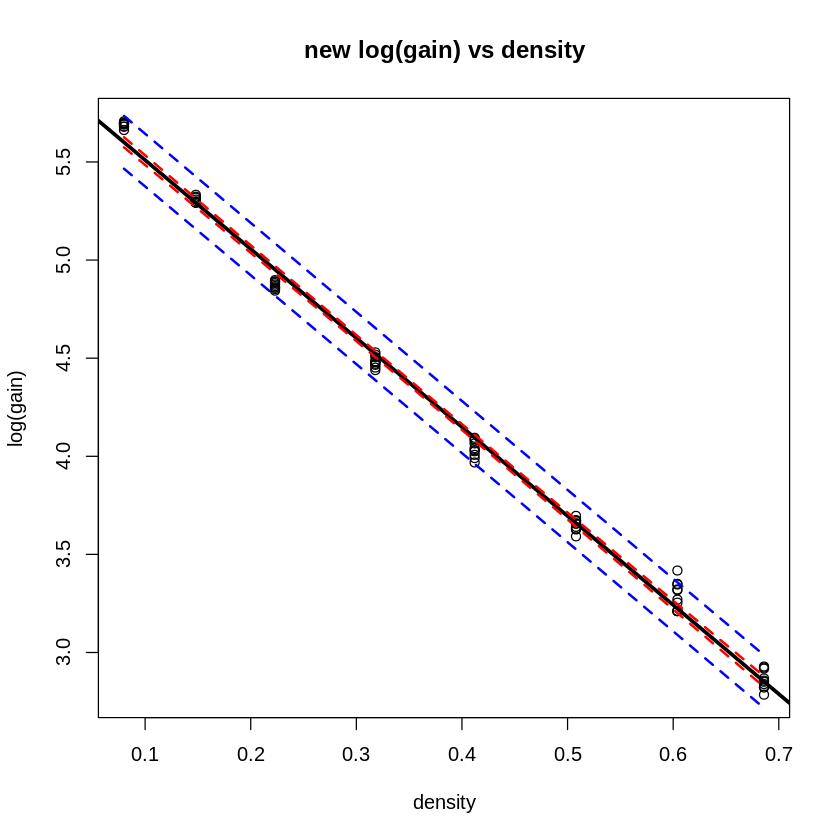

In [ ]:
# ^ Hmm... let's see if this change did anything big

# Find the confidence & prediction bands from Q4, assuming covariates
n_rows = nrow(data_with_log_scrubbed_0001)
Y = data_with_log_scrubbed_0001$log_gain
X = data_with_log_scrubbed_0001$density
plot(Y ~ X, main = "new log(gain) vs density", ylab = "log(gain)", xlab = "density")
lml = lm(Y ~ X)
abline(lm_log_gain_density_scrubbed_0001, col = 'black', lwd = 3)
seq_X = seq(min(X), max(X), length.out = n_rows)

conf_bands_0001 = predict(lml, newdata = data.frame(X=seq_X), interval = 'confidence')
lines(conf_bands_0001[,2] ~ seq_X, lwd = 2, lty = 2, col = 'red')
lines(conf_bands_0001[,3] ~ seq_X, lwd = 2, lty = 2, col = 'red')
pred_bands_0001 = predict(lml, newdata = data.frame(X=seq_X), interval = 'prediction')
lines(pred_bands_0001[,2] ~ seq_X, lwd = 2, lty = 2, col = 'blue')
lines(pred_bands_0001[,3] ~ seq_X, lwd = 2, lty = 2, col = 'blue')

In [ ]:
uncertainty_conf_bands_0001 = conf_bands_0001[,3] - conf_bands_0001[,2]
uncertainty_pred_bands_0001 = pred_bands_0001[,3] - pred_bands_0001[,2]
cat("Uncertainty range given by the confidence bands: ", uncertainty_conf_bands_0001,
"\nUncertainty range given by the prediction bands: ", uncertainty_pred_bands_0001)

cat("\nMean uncertainty range for confidence bands: ", mean(uncertainty_conf_bands_0001))
cat("\nMean uncertainty range for prediction bands: ", mean(uncertainty_pred_bands_0001))

Uncertainty range given by the confidence bands:  0.05159885 0.05069245 0.04979431 0.04890487 0.04802463 0.04715409 0.0462938 0.04544435 0.04460635 0.04378046 0.04296739 0.04216787 0.04138268 0.04061266 0.03985869 0.0391217 0.03840266 0.0377026 0.0370226 0.03636378 0.03572731 0.03511441 0.03452634 0.03396438 0.03342985 0.03292409 0.03244844 0.03200425 0.03159284 0.03121551 0.0308735 0.03056801 0.03030014 0.03007089 0.02988115 0.02973168 0.02962309 0.02955583 0.02953018 0.02954624 0.02960396 0.02970309 0.02984322 0.03002376 0.03024401 0.03050309 0.03080003 0.03113375 0.03150307 0.03190677 0.03234354 0.03281208 0.03331104 0.03383908 0.03439485 0.03497704 0.03558434 0.0362155 0.03686929 0.03754453 0.03824008 0.03895485 0.03968781 0.04043796 0.04120437 0.04198614 0.04278244 0.04359247 0.04441548 0.04525075 0.04609763 0.04695548 0.04782371 0.04870177 0.04958914 0.05048533 0.05138987 0.05230233 0.0532223 0.0541494 
Uncertainty range given by the prediction bands:  0.2691164 0.2689441 0.26877

In [ ]:
# inverse-predict (interval estimate) the density of a block with gain = 426.7, just like in Q5

# Substituting in log_gain = log(426.7)
point_est_g4 = (log(426.7) - lm_log_gain_density_scrubbed_0001$coefficients[1]) / lm_log_gain_density_scrubbed_0001$coefficients[2]
cat("Point estimate of density given gain = 426.7: ", point_est_g4)

# going to use the same uncertainty ranges found in the previous cell in an odd way
half_of_uncertainty_conf_bands_0001 = mean(uncertainty_conf_bands_0001)/2
half_of_uncertainty_pred_bands_0001 = mean(uncertainty_pred_bands_0001)/2
cat("\nConfidence band range: [", point_est_g4 - half_of_uncertainty_conf_bands_0001, ", ",
point_est_g4 + half_of_uncertainty_conf_bands_0001, "]")
cat("\nPrediction band range: [", point_est_g4 - half_of_uncertainty_pred_bands_0001, ", ",
point_est_g4 + half_of_uncertainty_pred_bands_0001, "]")

Point estimate of density given gain = 426.7:  -0.02051733
Confidence band range: [ -0.03973577 ,  -0.001298895 ]
Prediction band range: [ -0.1540197 ,  0.1129851 ]

The actual density, 0.001, does not fall within the confidence interval; only the prediction band range.

It doesn't look like throwing out the rows with density = 0.508 made a difference. Throwing out the 0.001 made the model even less accurate (though both models only captured the correct density in their prediction band range)